In [17]:

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,accuracy_score,mean_squared_log_error
from sklearn.metrics import roc_curve, auc,roc_auc_score,mean_squared_error
import xgboost as xgb
from numpy.linalg import inv
from xgboost.sklearn import XGBClassifier,XGBRegressor
from sklearn.kernel_ridge import KernelRidge
import matplotlib.dates
import operator
from quilt.data.ResidentMario import missingno_data 
import missingno as msno

In [18]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [19]:
#!pip install missingno

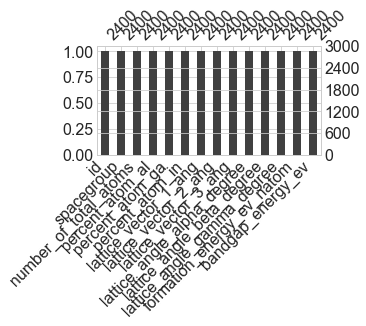

In [22]:
msno.bar(train,sort = True,figsize=(4,2))

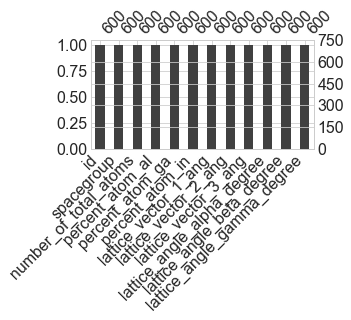

In [23]:
msno.bar(test,sort = True,figsize=(4,2))

In [36]:
for i in list(train.columns.values):
    print(i + " " , len(set(train[i])))

id  2400
spacegroup  6
number_of_total_atoms  6
percent_atom_al  42
percent_atom_ga  42
percent_atom_in  42
lattice_vector_1_ang  1288
lattice_vector_2_ang  1216
lattice_vector_3_ang  1210
lattice_angle_alpha_degree  457
lattice_angle_beta_degree  566
lattice_angle_gamma_degree  434
formation_energy_ev_natom  1733
bandgap_energy_ev  2307


In [37]:
train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


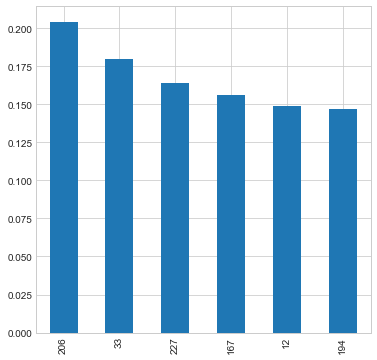

In [44]:
train['spacegroup'].value_counts(normalize = True).plot(kind = "bar",figsize = (6,6))

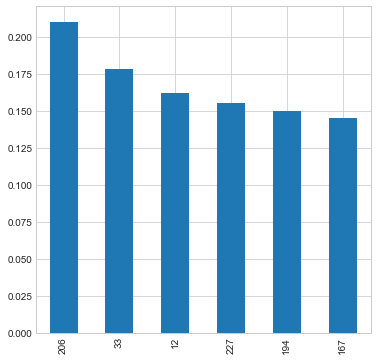

In [45]:
test['spacegroup'].value_counts(normalize= True).plot(kind = "bar",figsize = (6,6,))

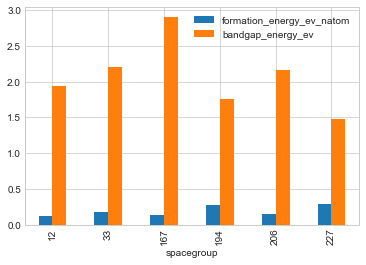

In [48]:
train.groupby('spacegroup')[['formation_energy_ev_natom','bandgap_energy_ev']].mean().plot(kind = "bar")

In [49]:
train['train_or_not'] = 1
test['train_or_not'] = 0

In [50]:
data = pd.concat([train,test],ignore_index=True)

In [52]:
def one_to_two(x):
    a = x['lattice_vector_1_ang']
    b = x['lattice_vector_2_ang']
    c = x['lattice_angle_gamma_degree']
    return np.sqrt( a**2 + b**2 - 2*a*b*math.cos(math.radians(c)))
data['one_to_two'] = data.apply(one_to_two,axis=1)

In [53]:
#Calculating the distance between lattice vector1 and lattice vector 3 via beta
def one_to_three(x):
    a = x['lattice_vector_1_ang']
    b = x['lattice_vector_3_ang']
    c = x['lattice_angle_beta_degree']
    return np.sqrt( a**2 + b**2 - 2*a*b*math.cos(math.radians(c)))
data['one_to_three'] = data.apply(one_to_three,axis=1)

In [54]:
#Calculating the distance between lattice vector2 and lattice vector 3 via alpha
def two_to_three(x):
    a = x['lattice_vector_2_ang']
    b = x['lattice_vector_3_ang']
    c = x['lattice_angle_alpha_degree']
    return np.sqrt(a**2 + b**2 - 2*a*b*math.cos(math.radians(c)))
data['two_to_three'] = data.apply(two_to_three,axis=1)

In [56]:
pd.crosstab(train['spacegroup'],train['number_of_total_atoms'])

number_of_total_atoms,10.0,20.0,30.0,40.0,60.0,80.0
spacegroup,,,,,,
12,0,84,0,0,0,274
33,0,0,0,126,0,306
167,0,0,326,0,48,0
194,13,0,0,0,0,340
206,0,0,0,0,0,490
227,0,0,0,393,0,0


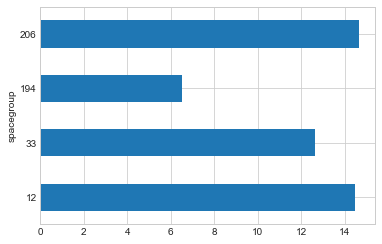

In [72]:
((data[(data['train_or_not'] ==  1 ) & (data['number_of_total_atoms'] ==80.0) ].groupby('spacegroup')['bandgap_energy_ev'].mean())/((data[(data['train_or_not'] ==1)&(data['number_of_total_atoms'] ==80.0)].groupby('spacegroup')['formation_energy_ev_natom'].mean()))).plot(kind='barh')


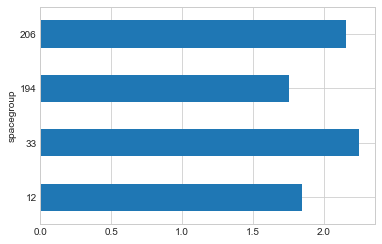

In [73]:
data[(data['number_of_total_atoms'] == 80) & (data['train_or_not'] == 1)].groupby('spacegroup')['bandgap_energy_ev'].mean().plot(kind='barh')

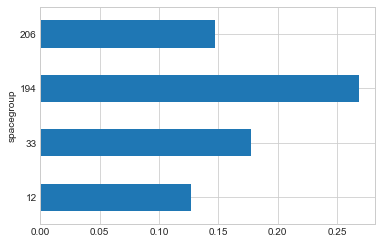

In [74]:
data[(data['number_of_total_atoms'] == 80) & (data['train_or_not'] == 1)].groupby('spacegroup')['formation_energy_ev_natom'].mean().plot(kind='barh')

In [76]:
data['bucket_sg_ratio_1'] = 0 
data['bucket_sg_ratio_2'] = 0
data['bucket_sg_ratio_1'][((data['spacegroup'] == 12) | data['spacegroup'] == 206) & (data['number_of_total_atoms'] == 80.0)] = 1
data['bucket_sg_ratio_2'][(data['spacegroup'] == 194) & (data['number_of_total_atoms'] ==80.0)] = 1

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [77]:
data.head()

,bandgap_energy_ev,formation_energy_ev_natom,id,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,spacegroup,train_or_not,one_to_two,one_to_three,two_to_three,bucket_sg_ratio_1,bucket_sg_ratio_2
0,3.4387,0.0680,1,90.0026,90.0023,90.0017,9.9523,8.5513,9.1775,80.0,0.6250,0.3750,0.000,33,1,13.121664,13.538172,12.544256,0,0
1,2.9210,0.2490,2,90.0186,89.9980,120.0025,6.1840,6.1838,23.6287,80.0,0.6250,0.3750,0.000,194,1,10.710964,24.424314,24.426414,0,1
2,2.7438,0.1821,3,90.9688,91.1228,30.5185,9.7510,5.6595,13.9630,40.0,0.8125,0.1875,0.000,227,1,5.659565,17.186719,15.154787,0,0
3,3.3492,0.2172,4,89.9888,90.0119,120.0017,5.0036,5.0034,13.5318,30.0,0.7500,0.0000,0.250,167,1,8.666390,14.428228,14.426266,0,0
4,1.3793,0.0505,5,89.9960,90.0006,119.9893,6.6614,6.6612,24.5813,80.0,0.0000,0.6250,0.375,194,1,11.537088,25.467980,25.467411,0,1


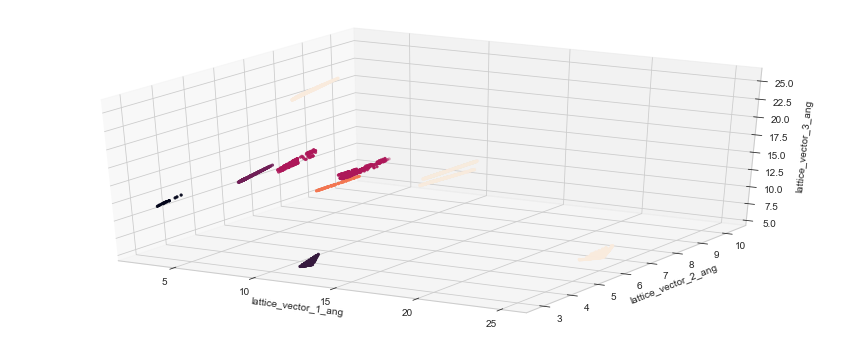

In [78]:
#XYZ coordinates and Number_of_total_atoms
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(19945133)
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['lattice_vector_1_ang'], data['lattice_vector_2_ang'], data['lattice_vector_3_ang'], c=data['number_of_total_atoms'], marker='.')
ax.set_xlabel('lattice_vector_1_ang')
ax.set_ylabel('lattice_vector_2_ang')
ax.set_zlabel('lattice_vector_3_ang')
plt.show()


In [81]:
from sklearn.cluster import KMeans
lattice_vector_123 = np.array(data[['lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang']])
kmeans = KMeans(n_clusters=10, random_state=51).fit(lattice_vector_123)

In [82]:
clusterings = pd.Series(kmeans.labels_)
clusterings.name = 'clusters_of_lattices'
data = pd.concat([data,clusterings],axis=1)
df1 = pd.get_dummies(data['clusters_of_lattices'])
df1.columns = ['clusters_of_lattices_'+ str(r) for r in list(df1.columns.values)]
data = pd.concat([data,df1],axis=1)

In [83]:
data.head()

,bandgap_energy_ev,formation_energy_ev_natom,id,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,number_of_total_atoms,...,clusters_of_lattices_0,clusters_of_lattices_1,clusters_of_lattices_2,clusters_of_lattices_3,clusters_of_lattices_4,clusters_of_lattices_5,clusters_of_lattices_6,clusters_of_lattices_7,clusters_of_lattices_8,clusters_of_lattices_9
0,3.4387,0.0680,1,90.0026,90.0023,90.0017,9.9523,8.5513,9.1775,80.0,...,0,0,0,0,0,0,0,0,0,1
1,2.9210,0.2490,2,90.0186,89.9980,120.0025,6.1840,6.1838,23.6287,80.0,...,0,0,1,0,0,0,0,0,0,0
2,2.7438,0.1821,3,90.9688,91.1228,30.5185,9.7510,5.6595,13.9630,40.0,...,0,0,0,0,0,0,1,0,0,0
3,3.3492,0.2172,4,89.9888,90.0119,120.0017,5.0036,5.0034,13.5318,30.0,...,0,0,0,0,0,0,0,0,1,0
4,1.3793,0.0505,5,89.9960,90.0006,119.9893,6.6614,6.6612,24.5813,80.0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
def area_calculator(x):
    a = x['one_to_two']
    b = x['one_to_three']
    c = x['two_to_three']
    p = (a+b+c)/2
    return np.sqrt(p*(p-a)*(p-b)*(p-c))
data['area'] = data.apply(area_calculator,axis=1)

In [86]:
data[data['train_or_not'] ==1 ][['area','formation_energy_ev_natom','bandgap_energy_ev']].corr()

,area,formation_energy_ev_natom,bandgap_energy_ev
area,1.000000,0.144829,-0.275617
formation_energy_ev_natom,0.144829,1.000000,-0.454246
bandgap_energy_ev,-0.275617,-0.454246,1.000000


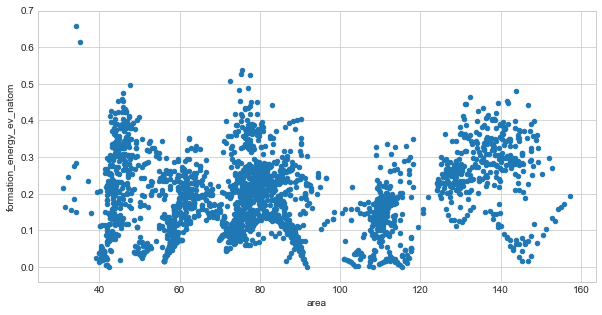

In [89]:
data[data['train_or_not']==1].plot(kind ="scatter", x = 'area',y = 'formation_energy_ev_natom',figsize = (10,5))

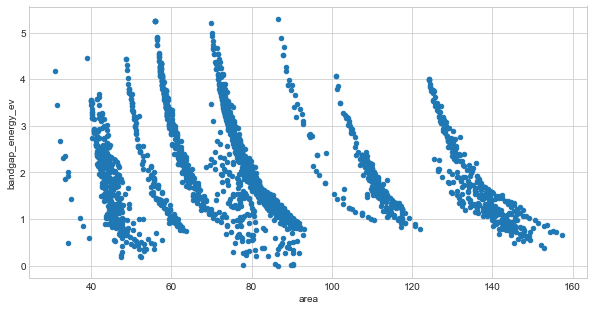

In [90]:
data[data['train_or_not']==1].plot(kind ="scatter", x = 'area',y = 'bandgap_energy_ev',figsize = (10,5))

In [91]:
def area_bucket(x):
    if (x>10) & (x<=57):
        return 1
    elif (x>57) & (x<=75):
        return 2
    elif (x>=75) & (x<90):
        return 3
    elif (x>=90) & (x<120):
        return 4
    else:
        return 5
data['area_bucket'] = data['area'].map(lambda x: area_bucket(x)) 

In [92]:
data.head()

,bandgap_energy_ev,formation_energy_ev_natom,id,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,number_of_total_atoms,...,clusters_of_lattices_2,clusters_of_lattices_3,clusters_of_lattices_4,clusters_of_lattices_5,clusters_of_lattices_6,clusters_of_lattices_7,clusters_of_lattices_8,clusters_of_lattices_9,area,area_bucket
0,3.4387,0.0680,1,90.0026,90.0023,90.0017,9.9523,8.5513,9.1775,80.0,...,0,0,0,0,0,0,0,1,73.732755,2
1,2.9210,0.2490,2,90.0186,89.9980,120.0025,6.1840,6.1838,23.6287,80.0,...,1,0,0,0,0,0,0,0,127.626563,5
2,2.7438,0.1821,3,90.9688,91.1228,30.5185,9.7510,5.6595,13.9630,40.0,...,0,0,0,0,1,0,0,0,42.049778,1
3,3.3492,0.2172,4,89.9888,90.0119,120.0017,5.0036,5.0034,13.5318,30.0,...,0,0,0,0,0,0,1,0,59.629688,2
4,1.3793,0.0505,5,89.9960,90.0006,119.9893,6.6614,6.6612,24.5813,80.0,...,1,0,0,0,0,0,0,0,143.093313,5


In [93]:
data.groupby('area_bucket')['formation_energy_ev_natom'].mean()

area_bucket
1    0.203731
2    0.145938
3    0.202229
4    0.130451
5    0.267972
Name: formation_energy_ev_natom, dtype: float64

In [94]:
data['atomic_density'] = data['number_of_total_atoms']/(data['lattice_vector_1_ang']*data['lattice_vector_2_ang']*data['lattice_vector_3_ang'])

In [95]:
data = data.drop([1235,1983])

In [96]:
df1 = pd.get_dummies(data['number_of_total_atoms'])
df1.columns = ['nota_'+ str(x) for x in list(df1.columns.values)]

In [97]:
data = pd.concat([data,df1],axis=1)


In [98]:
data.head()

,bandgap_energy_ev,formation_energy_ev_natom,id,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,number_of_total_atoms,...,clusters_of_lattices_9,area,area_bucket,atomic_density,nota_10.0,nota_20.0,nota_30.0,nota_40.0,nota_60.0,nota_80.0
0,3.4387,0.0680,1,90.0026,90.0023,90.0017,9.9523,8.5513,9.1775,80.0,...,1,73.732755,2,0.102426,0,0,0,0,0,1
1,2.9210,0.2490,2,90.0186,89.9980,120.0025,6.1840,6.1838,23.6287,80.0,...,0,127.626563,5,0.088537,0,0,0,0,0,1
2,2.7438,0.1821,3,90.9688,91.1228,30.5185,9.7510,5.6595,13.9630,40.0,...,0,42.049778,1,0.051910,0,0,0,1,0,0
3,3.3492,0.2172,4,89.9888,90.0119,120.0017,5.0036,5.0034,13.5318,30.0,...,0,59.629688,2,0.088556,0,0,1,0,0,0
4,1.3793,0.0505,5,89.9960,90.0006,119.9893,6.6614,6.6612,24.5813,80.0,...,0,143.093313,5,0.073344,0,0,0,0,0,1


In [99]:
data = data.reset_index(drop=True)

In [100]:
train = data[data['train_or_not'] == 1]
test = data[data['train_or_not'] == 0]

In [104]:
train.to_csv("transformed_train1.csv",index=False)
test.to_csv("transformed_test1.csv",index=False)


In [103]:
train.tail()

,bandgap_energy_ev,formation_energy_ev_natom,id,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,number_of_total_atoms,...,clusters_of_lattices_9,area,area_bucket,atomic_density,nota_10.0,nota_20.0,nota_30.0,nota_40.0,nota_60.0,nota_80.0
2393,3.7349,0.0381,2396,90.0038,90.0023,90.0015,4.9469,8.5014,9.1298,40.0,...,0,49.581828,1,0.104178,0,0,0,1,0,0
2394,3.4915,0.0670,2397,89.9938,90.0075,120.0007,4.9566,4.9562,13.4178,30.0,...,0,58.568657,2,0.091014,0,0,1,0,0,0
2395,3.2750,0.0906,2398,90.0047,90.0046,89.9954,9.2204,9.2200,9.2199,80.0,...,0,73.623044,2,0.102066,0,0,0,0,0,1
2396,1.3915,0.2566,2399,90.0015,89.9996,90.0004,10.6529,9.0954,9.7210,80.0,...,1,83.561571,3,0.084936,0,0,0,0,0,1
2397,4.2107,0.1135,2400,90.0027,90.0037,89.9987,9.0648,9.0641,9.0643,80.0,...,0,71.157657,2,0.107417,0,0,0,0,0,1
